<a href="https://colab.research.google.com/github/uditnm/Data-Science-assignments/blob/main/DS_assignment_2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [4]:
dataset = pd.read_csv('spam.csv',encoding='latin-1')

In [5]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
dataset.shape

(5572, 5)

In [8]:
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
dataset = dataset.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [10]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
dataset.shape

(5572, 2)

In [12]:
dataset = dataset.rename(columns = {"v1":"labels","v2":"text"})


In [13]:
dataset.head()

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
from sklearn import feature_extraction
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(dataset["text"])

In [15]:
dataset["labels"]=dataset["labels"].map({'spam':1,'ham':0})
y = dataset['labels']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [17]:
from sklearn import naive_bayes
model = naive_bayes.MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [18]:
y_pred=model.predict(X_test)
print(y_pred)

[1 0 0 ... 0 0 0]


In [20]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix obtained: ")
print(cm)

Confusion Matrix obtained: 
[[1426   16]
 [  11  219]]


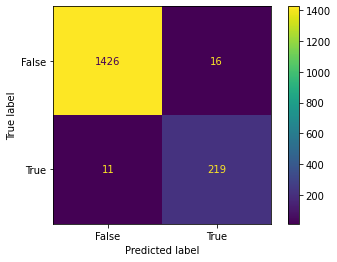

In [21]:
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =[False,True])
display.plot()
plt.show()

In [22]:
print("Accuracy of Naive Bayes classifier:",metrics.accuracy_score(y_test, y_pred))

Accuracy of Naive Bayes classifier: 0.9838516746411483


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1442
           1       0.93      0.95      0.94       230

    accuracy                           0.98      1672
   macro avg       0.96      0.97      0.97      1672
weighted avg       0.98      0.98      0.98      1672



### Support Vector Machine

In [24]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [25]:
y_pred1 = svc_model.predict(X_test)
print(y_pred1)

[1 0 0 ... 0 0 0]


In [26]:
cm1= confusion_matrix(y_test,y_pred1)
print("Confusion Matrix obtained: ")
print(cm1)


Confusion Matrix obtained: 
[[1442    0]
 [  44  186]]


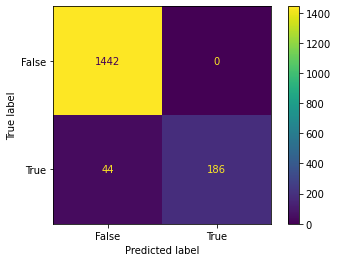

In [27]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels =[False,True])
cm_display.plot()
plt.show()

In [28]:
print("Accuracy of SVM model:",metrics.accuracy_score(y_test, y_pred1))

Accuracy of SVM model: 0.9736842105263158


In [29]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1442
           1       1.00      0.81      0.89       230

    accuracy                           0.97      1672
   macro avg       0.99      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672

